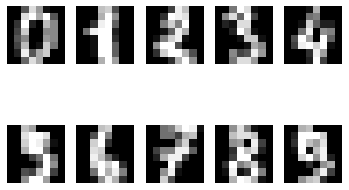

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.94      0.88      0.91        34
           2       0.78      0.85      0.82        34
           3       0.83      0.85      0.84        40
           4       0.71      0.79      0.75        34
           5       0.91      0.91      0.91        32
           6       0.91      0.86      0.89        37
           7       0.88      0.88      0.88        40
           8       0.69      0.67      0.68        33
           9       0.79      0.79      0.79        39

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      1.00      0.97        34
           2       0.94      1.00      0.97        34
           3       0.95 

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

digits = load_digits()
digits_data = digits.data
digits_label = digits.target


# digits 라는 데이터가 총 1979개이고, 각 데이터는 64개의 숫자로 이루어져있다는것을 확인.
# digits_data.shape 라는 함수를 사용하여 확인


#digits 데이터에 있는 64개의 숫자가 픽셀값을 의미, 과연 어떤 이미지인지

import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap = 'gray')
    plt.axis('off')
    
plt.show()


#Target 이름 출력

digits.target_names

#train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state =10)


#1 Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))


#2 Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))


#3 SVM

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

#4 SGD

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

#5 Logistic Regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))


#손글씨의 경우, 2번 Random Forest 가 가장 적합했습니다.
#이유는, 최대한 여러 tree 를 이용해 올바른 숫자를 뽑는자체가 중요하기 때문에
#다른 요소들을 중요시 요하는 유방암진단과는 다르게, Accuracy 가 가장 높은게 좋다고 생각했습니다.
